In [84]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, BatchNormalization
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [101]:
# Load your dataset
df = pd.read_csv('Synthetic Financial Datasets For Fraud Detection.csv')

# Select relevant columns for GAN generation
columns = ['step','amount', 'type']

# Encode 'type' column
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# Normalize numerical features
scaler = MinMaxScaler()
df[columns] = scaler.fit_transform(df[columns])

# Prepare data for training
X_train = df[columns].values

In [102]:
X_train

array([[0.00000000e+00, 1.06437179e-04, 7.50000000e-01],
       [0.00000000e+00, 2.01662565e-05, 7.50000000e-01],
       [0.00000000e+00, 1.95790998e-06, 1.00000000e+00],
       ...,
       [1.00000000e+00, 6.82716643e-02, 2.50000000e-01],
       [1.00000000e+00, 9.19463216e-03, 1.00000000e+00],
       [1.00000000e+00, 9.19463216e-03, 2.50000000e-01]])

In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

In [ ]:
input_dim = X_train.shape[1]  
latent_dim = 2

In [105]:
import tensorflow as tf
from tensorflow.keras import layers, Model

# Encoder
input_data = layers.Input(shape=(input_dim,))
encoded = layers.Dense(128, activation='relu')(input_data)
z_mean = layers.Dense(latent_dim)(encoded)
z_log_var = layers.Dense(latent_dim)(encoded)

# Reparameterization trick
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder
decoder_input = layers.Input(shape=(latent_dim,))
decoded = layers.Dense(128, activation='relu')(decoder_input)
output_data = layers.Dense(input_dim, activation='sigmoid')(decoded)

# Define VAE model
encoder = Model(input_data, z)
decoder = Model(decoder_input, output_data)
vae_output = decoder(encoder(input_data))

vae = Model(input_data, vae_output)
vae.compile(optimizer='adam', loss='mse')

# Train VAE
history = vae.fit(X_train, X_train, epochs=10, batch_size=32)

Epoch 1/10
198832/198832 ━━━━━━━━━━━━━━━━━━━━ 395s 2ms/step - loss: 3.6162e-04
Epoch 2/10
198832/198832 ━━━━━━━━━━━━━━━━━━━━ 405s 2ms/step - loss: 2.4864e-06
Epoch 3/10
198832/198832 ━━━━━━━━━━━━━━━━━━━━ 399s 2ms/step - loss: 1.8240e-06
Epoch 4/10
198832/198832 ━━━━━━━━━━━━━━━━━━━━ 397s 2ms/step - loss: 1.8429e-06
Epoch 5/10
198832/198832 ━━━━━━━━━━━━━━━━━━━━ 403s 2ms/step - loss: 1.6572e-06
Epoch 6/10
198832/198832 ━━━━━━━━━━━━━━━━━━━━ 397s 2ms/step - loss: 1.5139e-06
Epoch 7/10
198832/198832 ━━━━━━━━━━━━━━━━━━━━ 401s 2ms/step - loss: 1.5909e-06
Epoch 8/10
198832/198832 ━━━━━━━━━━━━━━━━━━━━ 408s 2ms/step - loss: 1.4887e-06
Epoch 9/10
198832/198832 ━━━━━━━━━━━━━━━━━━━━ 393s 2ms/step - loss: 1.6276e-06
Epoch 10/10
198832/198832 ━━━━━━━━━━━━━━━━━━━━ 417s 2ms/step - loss: 1.6240e-06


In [106]:
synthetic_data = decoder.predict(np.random.normal(size=(100, latent_dim)))

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/stepWARNING:tensorflow:6 out of the last 212 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001F2670982C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


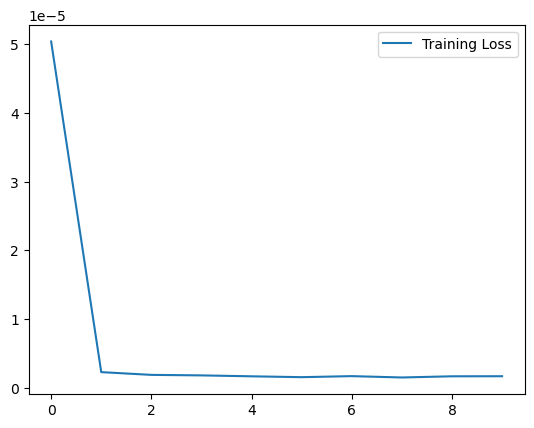

In [112]:
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.legend()
plt.show()

In [116]:
synthetic_data_original_scale = scaler.inverse_transform(synthetic_data)

In [118]:
synthetic_data_original_scale

array([[5.6948086e+01, 7.5426350e+05, 4.0000000e+00],
       [1.5628256e+02, 5.8245269e+05, 3.9999983e+00],
       [6.7832153e+02, 5.4445238e+04, 4.0000000e+00],
       [1.6181320e+01, 6.6203421e-01, 4.0000000e+00],
       [2.5923691e+02, 5.4507492e+04, 3.9327834e+00],
       [2.7873337e+02, 8.4539968e+07, 3.9995129e+00],
       [9.4481255e+01, 1.1765719e+05, 3.9999945e+00],
       [1.6430962e+02, 1.6046113e+07, 3.9666898e+00],
       [3.7165109e+02, 9.8778838e+03, 3.9920166e+00],
       [1.0000638e+00, 8.4644651e+00, 4.0000000e+00],
       [1.0000000e+00, 5.0635862e-01, 4.0000000e+00],
       [4.3520588e+01, 1.5589254e+06, 4.0000000e+00],
       [1.0000001e+00, 5.6426745e+06, 3.9999962e+00],
       [1.0000000e+00, 8.8354160e+07, 4.0000000e+00],
       [1.0000010e+00, 8.9296696e+07, 4.0000000e+00],
       [1.9607869e+02, 1.2727719e+03, 4.0000000e+00],
       [6.8406989e+02, 2.5124224e+07, 4.0000000e+00],
       [1.0000001e+00, 8.6339070e+06, 4.0000000e+00],
       [4.4425159e+02, 8.154

In [132]:
synthetic_data_original_scale[:, 0] = synthetic_data_original_scale[:, 0].astype(int)  
synthetic_data_original_scale[:, 2] = synthetic_data_original_scale[:, 2].astype(int)  

In [134]:
print(synthetic_data_original_scale[0:5])

[[5.6000000e+01 7.5426350e+05 4.0000000e+00]
 [1.5600000e+02 5.8245269e+05 3.0000000e+00]
 [6.7800000e+02 5.4445238e+04 4.0000000e+00]
 [1.6000000e+01 6.6203421e-01 4.0000000e+00]
 [2.5900000e+02 5.4507492e+04 3.0000000e+00]]
